In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import register_matplotlib_converters
from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.dates as mdates

In [86]:
def get_data():
    data = pd.read_excel('data.xls')
    return data

In [87]:
def get_dataframe():
    data = pd.read_excel('data.xls')
    df = pd.DataFrame(data)
    return df

In [4]:
def filter_data(df=None, start_date=None, end_date=None, province=None):
    result = df[(df['DATE'] >= str(start_date)) 
                (df['DATE'] <= str(end_date))]

    if province != None:
        result = result[['DATE', f'{province}']]

    return result.to_string(index=False)


In [6]:
df = get_data()

result = filter_data(df=df,
                     start_date='2021-01-01',
                     end_date='2021-01-10')
print(result)

      DATE  ACEH   BALI  BANTEN  BABEL  BENGKULU    DIY  JAKARTA  JAMBI  JABAR  JATENG  JATIM  KALBAR  KALTIM  KALTENG  KALSES  KALTARA  KEPRI   NTB  SUMSEL  SUMBAR  SULUT  SUMUT  SULTRA  SULSEL  SULTENG  LAMPUNG   RIAU  MALUT  MALUKU  PAPBAR  PAPUA  SULBAR   NTT  GORONTALO
2021-01-01  8753  17694   18457   2417      3671  12388   185691   3263  85083   82613  85039    3136   27374     9835   15402     3829   7014  5724   11900   23611   9724  18233    7986   31597     3617     6356  25113   2773    5754    5995  13227    1954  2181       3866
2021-01-02  8761  17859   18703   2477      3690  12679   187585   3296  86250   83584  85762    3136   27587     9894   15419     3879   7033  5783   11945   23649   9784  18319    8019   32187     3683     6471  25181   2782    5772    6012  13250    1960  2216       3866
2021-01-03  8763  17978   18839   2537      3735  12897   189243   3322  87482   84512  86361    3160   27892     9958   15490     3993   7046  5804   11998   23710   9865  18

In [88]:
df = get_dataframe()

In [89]:
print(df)

          DATE   ACEH   BALI  BANTEN  BABEL  BENGKULU    DIY  JAKARTA  JAMBI  \
0   2020-03-18      0      1      17      0         0      3      158      0   
1   2020-03-19      0      1      27      0         0      5      210      0   
2   2020-03-20      0      4      37      0         0      4      215      0   
3   2020-03-21      0      3      43      0         0      5      267      0   
4   2020-03-22      0      3      47      0         0      5      307      0   
..         ...    ...    ...     ...    ...       ...    ...      ...    ...   
385 2021-04-07   9985  41054   44534   9889      5619  34783   388338   6512   
386 2021-04-08  10027  41259   44655   9984      5687  35003   389577   6562   
387 2021-04-09  10055  41466   44798  10055      5734  35225   390590   6612   
388 2021-04-10  10075  41619   44897  10109      5750  35455   391567   6620   
389 2021-04-11  10082  41734   45002  10292      5795  35585   392598   6640   

      JABAR  ...  LAMPUNG   RIAU  MALUT

In [84]:
df.head()

,DATE,ACEH,BALI,BANTEN,BABEL,BENGKULU,DIY,JAKARTA,JAMBI,JABAR,...,SULTENG,LAMPUNG,RIAU,MALUT,MALUKU,PAPBAR,PAPUA,SULBAR,NTT,GORONTALO
0,2020-03-18,0,1,17,0,0,3,158,0,24,...,0,1,1,0,0,0,0,0,0,0
1,2020-03-19,0,1,27,0,0,5,210,0,26,...,0,1,2,0,0,0,0,0,0,0
2,2020-03-20,0,4,37,0,0,4,215,0,41,...,0,1,1,0,0,0,0,0,0,0
3,2020-03-21,0,3,43,0,0,5,267,0,55,...,0,1,1,0,0,0,0,0,0,0
4,2020-03-22,0,3,47,0,0,5,307,0,59,...,0,1,1,0,1,0,2,0,0,0


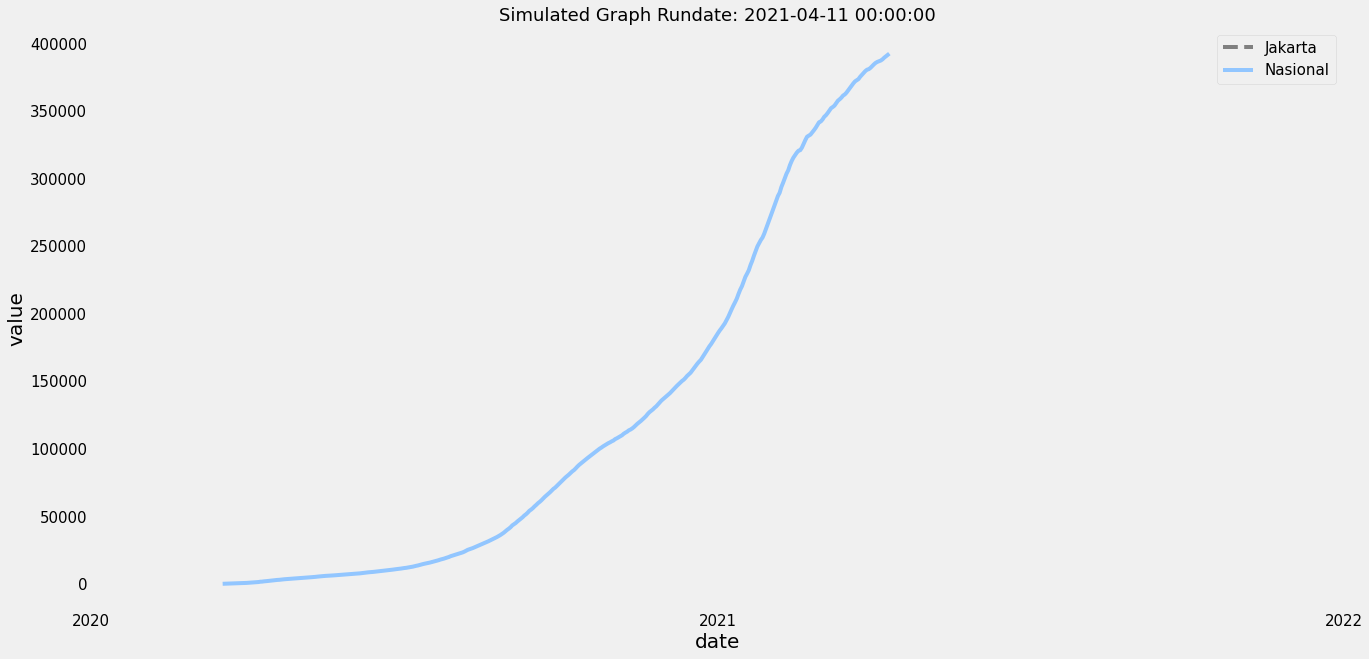

In [98]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
plt.style.use('seaborn-pastel')

#create the figure
fig = plt.figure() 

#figure size
plt.rcParams["figure.figsize"] = (20,10)

# round to nearest years.
datemin = np.datetime64(df['DATE'][0], 'Y')
datemax = np.datetime64(df['DATE'].iloc[-1], 'Y') + np.timedelta64(1, 'Y')

# setting a title for the plot 
plt.title('My animated forecasting graph',fontsize=18) 

#create axis limits
ax = plt.axes(xlim=(datemin, datemax))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# Create empty lines we are going to plot as part of the animation
line, = ax.plot([], [],color='grey',linestyle='dashed',label='Jabar')
# Static line that will appear on the graph
line2, = ax.plot(df['DATE'],df['JAKARTA'],label= 'Jakarta')


# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
# t is our iteration parameter
    t = i 

# x, y values to be plotted
    x = df['DATE'][t]
    y = df['JABAR'][t] 
# As t increases we will append the list of x,y values 
    xdata.append(x) 
    ydata.append(y) 
#set the appended values into the empty line graph we created
    line.set_data(xdata, ydata) 
# setting a title for the plot with the date the forecast ran
    plt.title('Simulated Graph Rundate: %s' %df['DATE'][t],fontsize=18) 
    return line

    
#add legend
plt.legend(fontsize=15)
#gridline
plt.grid()
# Add x and y lables, and set their font size
plt.xlabel("date", fontsize=20)
plt.ylabel("value", fontsize=20)
# Set the font size of the number lables on the axes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Use the FuncAnimation from matplotlib
anim = FuncAnimation(fig, animate, init_func=init, frames=df.shape[0], blit=False,interval=500) 

#save GIF
anim.save('my_animation.mp4')